# This notebook will cover the solvation of single molecules (small molecules and polymers) for simulation.

This notebook will elaborate further the use of the **BuildAmberSystems** class by solvating a single molecule and generating its parameters for MD simulations.

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class as detailed in the first tutorial.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. This class was utilised in the second tutorial.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

In [2]:
#help(SnippetSimManage)

# Setting up *Manager* and *Builder* classes

In [3]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

Now set up a 'builder' variable using the **BuildAmberSystems** class and pass the manager class to it.

In [4]:
builder = BuildAmberSystems(manager)

# 1. Solvating a single molecule

Using the **solvate_molecule** method from the **builder** class will solvate the molecule in a box of TIP3P water (a buffer of 5 angstroms is placed around the molecule to be solvated). This will generate files for molecular dynamics with amber.

In [5]:
output = builder.solvate_molecule("caffeine")

Current directory: /home/dan/polymersimulator/pdb_files/molecules/caffeine
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source caffeine_wat_solv_12.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./caffeine_wat_solv_12.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda

The output variable will return the name of the system

In [6]:
# Return the name of the output file
output

'caffeine_wat_solv_12'

Lets visualise the solvated caffeine molecule.

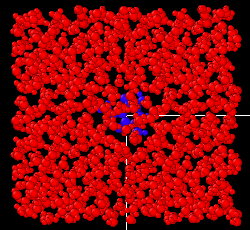

(its a bit hard to see, but the caffeine molecule is in blue)

Lets check if the amber topology and coordinates are generated.

In [7]:
# Check if the amber topology and coordinates are generated
manager.load_amber_filepaths(output)

('/home/dan/polymersimulator/pdb_files/systems/caffeine_wat_solv/caffeine_wat_solv_12.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/caffeine_wat_solv/caffeine_wat_solv_12.rst7')

# 2. Solvating a polymer 
We can also solvate a polymer pdb. We require the head, mainchain and tail polymeric units and a polymer as shown in tutorial 2 to run these commands. The polymer is solvated in a box of TIP3P water (a buffer of 5 angstroms is placed around the molecule to be solvated). Amber topologies and coordinates are generate for this system.

In [8]:
output = builder.gen_polymer_pdb("3HB_trimer", 10)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

In [9]:
output

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb'

In [10]:
# Solavate a polymer

# Example Usage:
# output = builder.solvate_polymer_pdb(base_trimer_name, polymer_name)

# We must pass the name of base trimer, "3HB_trimer" in this example - the polymeric units contained in this folder (need those to generate parameters)
# We also pass the name of our generated polymer to this function
# The preparation of both the base trimer and the polymer must have been carried out as explained in tutorial 2

output = builder.solvate_polymer_pdb("3HB_trimer", "3HB_10_polymer")

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer_wat_solv.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer_wat_solv.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading librar

In [11]:
# Output variable is the name of the system generated - the number is the volume of the box
output 

'3HB_10_polymer_wat_solv_12626'

In [12]:
# Check if the amber files were generated
manager.load_amber_filepaths(output)

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_wat_solv/3HB_10_polymer_wat_solv_12626.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_wat_solv/3HB_10_polymer_wat_solv_12626.rst7')

Lets visualise the outputtted system:

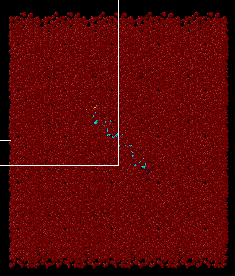

(its hard to see again... but this is the straight 3HB_10-mer solvated in water.